In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from prettytable import PrettyTable

# Gene network:

In [4]:
def read_network(network_file_name):
    network = nx.read_edgelist(network_file_name, delimiter='\t')
    return network

def write_network_edge_list(network, output_file_name):
    nx.write_edgelist(network, output_file_name, data=False, delimiter='\t')
    
def combine_gene_network(gene_network_nx_list):
    consensus_gene_network = nx.Graph()

    for gene_network in gene_network_nx_list:
        for g_i, g_j in gene_network.edges:
            if not consensus_gene_network.has_edge(g_i, g_j):
                consensus_gene_network.add_edge(g_i, g_j)

    return consensus_gene_network

def get_network_metrics_full_network(network):
    tab = PrettyTable()    
    tab.field_names = ["Nodes", "Edges", "MeanDegree", "Density", "Components"]
    
    n = len(network)
    e = network.number_of_edges()
    degree = dict(network.degree())
    degree = list(degree.values())
    degree = np.array(degree)
    md = round(np.mean(degree), 2)
    d = round(nx.density(network), 6)
    c = nx.number_connected_components(network)
    tab.add_row([n, e, md, d, c])           
    print(tab)

def leverageCentrality(G):
    nodes = list(G.nodes)
    degrees = G.degree
    leverageCentrality ={}
    for node in nodes:
        if(len(list(G.neighbors(node)))==0):
            leverageCentrality[node] = 0
        else:
            leverage=0
            for n in G.neighbors(node):
                leverage += (degrees[node]-degrees[n]) / (degrees[node]+degrees[n])

            leverageCentrality[node] = round(((1/degrees[node]) * leverage),4)

    return leverageCentrality

def averageNeighborDegree(G):
    nodes = list(G.nodes)
    degrees = G.degree
    averageNeighborDegree ={}
    for node in nodes:
        neighborsDegree=0
        if(len(list(G.neighbors(node)))==0):
            averageNeighborDegree[node] = 0
        else:
            for n in G.neighbors(node):
                neighborsDegree += degrees[n]

            averageNeighborDegree[node] = neighborsDegree/len(list(G.neighbors(node)))

    return averageNeighborDegree

def bridgingCentrality(G):
    nodes = list(G.nodes)
    degrees = G.degree
    bet = nx.betweenness_centrality(G)
    bridging_centrality={}

    for node in nodes:
        if(degrees[node]!=0):
            nodeDegreeInverse = degrees[node]**-1
            neighborsDegreeInverse=0
            for n in G.neighbors(node):
                neighborsDegreeInverse += degrees[n]**-1

            bridging_centrality[node] = (nodeDegreeInverse/neighborsDegreeInverse) * bet[node]
        else:
            bridging_centrality[node] = 0
    return bridging_centrality

'''
Functions to get node measures of a network.
Each function produces a file with the name of gene and its corresponding measure
'''
def get_df_degree_centrality(network, output_file_name):
    centrality = nx.degree_centrality(network)
    degree_df = pd.DataFrame([centrality]).T
    degree_df.columns=["degree"]
    degree_df.index.name = 'gene'
    degree_df.to_csv(output_file_name, sep="\t", index=True)

def get_df_closeness_centrality(network, output_file_name):
    centrality = nx.closeness_centrality(network)
    closeness_df = pd.DataFrame([centrality]).T
    closeness_df.columns=["closeness"]
    closeness_df.index.name = 'gene'
    closeness_df.to_csv(output_file_name, sep="\t", index=True)

def get_df_betweenness_centrality(network, output_file_name):
    centrality = nx.betweenness_centrality(network)
    betweenness_df = pd.DataFrame([centrality]).T
    betweenness_df.columns=["betweenness"]
    betweenness_df.index.name = 'gene'
    betweenness_df.to_csv(output_file_name, sep="\t", index=True)

def get_df_eigenvector_centrality(network, output_file_name):
    centrality = nx.eigenvector_centrality(network, max_iter = 1000)
    eigenvector_df = pd.DataFrame([centrality]).T
    eigenvector_df.columns=["eigenvector"]
    eigenvector_df.index.name = 'gene'
    eigenvector_df.to_csv(output_file_name, sep="\t", index=True)

def get_df_kcore(network, output_file_name):
    kc = nx.core_number(network)
    kc_df = pd.DataFrame([kc]).T
    kc_df.columns=["kcore"]
    kc_df.index.name = 'gene'
    kc_df.to_csv(output_file_name, sep="\t", index=True)

def get_df_clustering_coefficient(network, output_file_name):
    cc = {}
    for gene in network.nodes():
        cc[gene] = nx.clustering(network, gene)
    cc_df = pd.DataFrame([cc]).T
    cc_df.columns=["clusteringcoeff"]
    cc_df.index.name = 'gene'
    cc_df.to_csv(output_file_name, sep="\t", index=True)

def get_df_average_neighbors_degree_centrality(network, output_file_name):
    centrality = averageNeighborDegree(network)
    average_neighbors = pd.DataFrame([centrality]).T
    average_neighbors.columns=["average_neighbors"]
    average_neighbors.index.name = 'gene'
    average_neighbors.to_csv(output_file_name, sep="\t", index=True) 

def get_df_leverage_centrality(network, output_file_name):
    centrality = leverageCentrality(network)
    leverage = pd.DataFrame([centrality]).T
    leverage.columns=["leverage"]
    leverage.index.name = 'gene'
    leverage.to_csv(output_file_name, sep="\t", index=True)

def get_df_information_centrality(network, output_file_name):
    #Only One CC
    #network = network.subgraph(max(nx.connected_components(network), key=len))
    centrality = nx.information_centrality(network)
    information_df = pd.DataFrame([centrality]).T
    information_df.columns=["information"]
    information_df.index.name = 'gene'
    information_df.to_csv(output_file_name, sep="\t", index=True) 
    
def get_df_bridging_centrality(network, output_file_name):
    centrality = bridgingCentrality(network)
    bridging = pd.DataFrame([centrality]).T
    bridging.columns=["bridging"]
    bridging.index.name = 'gene'
    bridging.to_csv(output_file_name, sep="\t", index=True)
    
# return the main component
def get_combined_gene_network():
    gene_network_nx_list = []    
    gene_network_names = ["eReactome", "eHPRD"]
    for network_name in gene_network_names:
        gene_network_file_name = "./data/Networks/" + network_name + ".txt"
        network_nx = read_network(gene_network_file_name)
        gene_network_nx_list.append(network_nx)

    consensus_gene_network = combine_gene_network(gene_network_nx_list)
    output_file_name = "./data/Networks/eReactome_eHPRD.txt"
    print("Original consensus network:")
    get_network_metrics_full_network(consensus_gene_network)
    
    print("Main component:")
    consensus_gene_network = consensus_gene_network.subgraph(max(nx.connected_components(consensus_gene_network), key=len))
    get_network_metrics_full_network(consensus_gene_network)
    write_network_edge_list(consensus_gene_network, output_file_name)
    return consensus_gene_network

# Example of use:
# gene_network_file_name = "./data/Reactome_HPRD_HuRI_HINT.txt"
# output_file_name = "./data/degree_Reactome_HPRD_HuRI_HINT.tsv"
# network = read_network(gene_network_file_name)
# get_df_degree_centrality(network, output_file_name)

# rapidos:
# - degree
# - eigenvector
# - kcore
# - average_neighbors_degree_centrality
# - leverage
# - clustering_coefficient 

# demorados - necessita executar no cluster:
# - closeness
# - betweenness
# - bridging
# - information

In [4]:
# Creating a combined network    
# consensus_gene_network = get_combined_gene_network()

Original consensus network:
+-------+---------+------------+----------+------------+
| Nodes |  Edges  | MeanDegree | Density  | Components |
+-------+---------+------------+----------+------------+
| 15432 | 3388292 |   439.13   | 0.028457 |     61     |
+-------+---------+------------+----------+------------+
Main component:
+-------+---------+------------+----------+------------+
| Nodes |  Edges  | MeanDegree | Density  | Components |
+-------+---------+------------+----------+------------+
| 15294 | 3388191 |   443.07   | 0.028972 |     1      |
+-------+---------+------------+----------+------------+


In [6]:
%%time
gene_network_file_name = "./data/Networks/eReactome_eHPRD.txt"
network = read_network(gene_network_file_name)

CPU times: user 13.9 s, sys: 499 ms, total: 14.4 s
Wall time: 14.3 s


In [4]:
%%time
output_file_name = "./data/degree_eReactome_eHPRD.tsv"
get_df_degree_centrality(network, output_file_name)

CPU times: user 1.23 s, sys: 24 ms, total: 1.25 s
Wall time: 1.26 s


In [5]:
%%time
output_file_name = "./data/eigenvector_eReactome_eHPRD.tsv"
get_df_eigenvector_centrality(network, output_file_name)

CPU times: user 54.8 s, sys: 75.6 ms, total: 54.9 s
Wall time: 54.9 s


In [6]:
%%time
output_file_name = "./data/kcore_eReactome_eHPRD.tsv"
get_df_kcore(network, output_file_name)

CPU times: user 1min 20s, sys: 32 ms, total: 1min 20s
Wall time: 1min 20s


In [7]:
%%time
output_file_name = "./data/average_neighbors_degree_eReactome_eHPRD.tsv"
get_df_average_neighbors_degree_centrality(network, output_file_name)

CPU times: user 5.3 s, sys: 3.99 ms, total: 5.3 s
Wall time: 5.3 s


In [8]:
%%time
output_file_name = "./data/leverage_eReactome_eHPRD.tsv"
get_df_leverage_centrality(network, output_file_name)

CPU times: user 12.3 s, sys: 4.01 ms, total: 12.3 s
Wall time: 12.3 s


In [9]:
%%time
output_file_name = "./data/clusteringcoeff_eReactome_eHPRD.tsv"
get_df_clustering_coefficient(network, output_file_name)

CPU times: user 18min 12s, sys: 272 ms, total: 18min 12s
Wall time: 18min 12s


# Mutation data:

In [11]:
def get_mutation_count(maf):
    mutation_count = pd.crosstab(maf.Hugo_Symbol, maf.Variant_Classification)
    return mutation_count

def get_patient_count(maf):
    patient_count = pd.pivot_table(maf, index=["Hugo_Symbol"], values=["Tumor_Sample_Barcode"], aggfunc=len)
    patient_count = patient_count.rename(columns={"Tumor_Sample_Barcode": "nr_patients"})
    return patient_count

def filter_by_variants(maf):
    variants_to_keep = ['Frame_Shift_Del','Frame_Shift_Ins','In_Frame_Del','In_Frame_Ins','Missense_Mutation','Nonsense_Mutation','Nonstop_Mutation','Splice_Site','Translation_Start_Site']
    maf = maf[maf.Variant_Classification.isin(variants_to_keep)]
    return maf

def get_mutations_per_patient(maf):
    mutations_per_patient = {}
    patients = set(maf["Tumor_Sample_Barcode"])
    for patient in patients:
        maf_one_gene = maf[maf.Tumor_Sample_Barcode.isin([patient])]
        mutations_per_patient[patient] = len(maf_one_gene)
    return mutations_per_patient

def remove_hipermutated_patients(maf, mutations_per_patient):
    mutations_per_patient_count = list(mutations_per_patient.values())
    q1 = np.quantile(mutations_per_patient_count, .25)
    q2 = np.quantile(mutations_per_patient_count, .50)
    q3 = np.quantile(mutations_per_patient_count, .75)
    iqr = q3 - q1
    threshold_hm = q3 + 4.5 * iqr
    mutations_per_patient_filtered = dict(filter(lambda elem: elem[1] <= threshold_hm, mutations_per_patient.items()))
    maf = maf[maf.Tumor_Sample_Barcode.isin(list(mutations_per_patient_filtered))]
    return maf

def write_maf(maf, output_file_name):
    maf.to_csv(output_file_name, sep='\t', index=False)

def get_df_mutation_data(input_maf_file_name, output_file_name): 
    maf = pd.read_csv(input_maf_file_name, sep="\t", comment='#', usecols=["Hugo_Symbol", "Tumor_Sample_Barcode", "Variant_Classification"])
    mutation_count = get_mutation_count(maf)
    patient_count = get_patient_count(maf)

    genes = set(maf["Hugo_Symbol"])
    
    features = list(patient_count) + list(mutation_count)
    df = pd.DataFrame(index=genes, columns=features)
    df.index.name = 'gene'
    df = df.fillna(0)
    df.update(mutation_count)
    df.update(patient_count)
    df.to_csv(output_file_name, sep="\t", index=True) 

In [13]:
# Get mutation files from cBioPortal, using API
from bravado.client import SwaggerClient

cbioportal = SwaggerClient.from_url('https://www.cbioportal.org/api/api-docs',
                                config={"validate_requests":False,"validate_responses":False})

for a in dir(cbioportal):
    cbioportal.__setattr__(a.replace(' ', '_').lower(), cbioportal.__getattr__(a))

id_study_list = ["laml", "acc", "blca", "lgg", "brca", "cesc", "chol", "coadread", "dlbc", "esca",
                 "gbm", "hnsc", "kich", "kirc", "kirp", "lihc", "luad", "lusc", "meso", "ov",
                 "paad", "pcpg", "prad", "sarc", "skcm", "stad", "tgct", "thym", "thca", "ucs",
                 "ucec", "uvm"]

for id_study in id_study_list:
    id_study = id_study + "_tcga_pan_can_atlas_2018"

    muts = cbioportal.mutations.getMutationsInMolecularProfileBySampleListIdUsingGET(
        molecularProfileId = id_study +"_mutations", # {study_id}_mutations gives default mutations profile for study 
        sampleListId = id_study + "_all", # {study_id}_all includes all samples
        projection="DETAILED" # include gene info
    ).result()

    maf=[]  
    for mut in muts:
        line=[]
        line.append(mut["gene"]["hugoGeneSymbol"])
        line.append(mut["sampleId"])
        line.append(mut["mutationType"])
        maf.append(line)
        
    maf = pd.DataFrame(maf,columns = ["Hugo_Symbol", "Tumor_Sample_Barcode", "Variant_Classification"])
    num_genes = len(set(maf["Hugo_Symbol"]))
    num_patients = len(set(maf["Tumor_Sample_Barcode"]))
    num_mutations = maf.shape[0]
    print(id_study, num_genes, num_patients, num_mutations)
    write_maf(maf, "./data/MAFs/"+id_study+"_raw.maf")

laml_tcga_pan_can_atlas_2018 4831 200 7284
acc_tcga_pan_can_atlas_2018 5546 91 8108
blca_tcga_pan_can_atlas_2018 17112 410 102465
lgg_tcga_pan_can_atlas_2018 11817 511 28754
brca_tcga_pan_can_atlas_2018 17169 1066 94940
cesc_tcga_pan_can_atlas_2018 15465 291 56948
chol_tcga_pan_can_atlas_2018 1828 36 2125
coadread_tcga_pan_can_atlas_2018 18347 534 209724
dlbc_tcga_pan_can_atlas_2018 3343 41 4938
esca_tcga_pan_can_atlas_2018 11368 182 26784
gbm_tcga_pan_can_atlas_2018 14180 396 47136
hnsc_tcga_pan_can_atlas_2018 16087 515 76772
kich_tcga_pan_can_atlas_2018 1914 65 2170
kirc_tcga_pan_can_atlas_2018 10293 402 20785
kirp_tcga_pan_can_atlas_2018 10371 276 20707
lihc_tcga_pan_can_atlas_2018 13447 366 37918
luad_tcga_pan_can_atlas_2018 17491 566 160265
lusc_tcga_pan_can_atlas_2018 17222 484 129714
meso_tcga_pan_can_atlas_2018 2392 86 2813
ov_tcga_pan_can_atlas_2018 13567 523 39504
paad_tcga_pan_can_atlas_2018 10252 177 21110
pcpg_tcga_pan_can_atlas_2018 1798 178 2092
prad_tcga_pan_can_atlas_2

In [14]:
'''
 - Preprocessing Mutation Data
 - Creating data set with mutation data
'''
id_study_list = ["laml", "acc", "blca", "lgg", "brca", "cesc", "chol", "coadread", "dlbc", "esca",
                 "gbm", "hnsc", "kich", "kirc", "kirp", "lihc", "luad", "lusc", "meso", "ov",
                 "paad", "pcpg", "prad", "sarc", "skcm", "stad", "tgct", "thym", "thca", "ucs",
                 "ucec", "uvm"]

maf_list = []
for id_study in id_study_list:
    id_study_raw = "./data/MAFs/" + id_study + "_tcga_pan_can_atlas_2018_raw.maf"
    id_study = id_study + "_tcga_pan_can_atlas_2018"
    maf = pd.read_csv(id_study_raw, sep='\t')
    maf = filter_by_variants(maf)
    mutations_per_patient = get_mutations_per_patient(maf)
    maf = remove_hipermutated_patients(maf, mutations_per_patient)
    num_genes = len(set(maf["Hugo_Symbol"]))
    num_patients = len(set(maf["Tumor_Sample_Barcode"]))
    num_mutations = maf.shape[0]
    print(id_study, num_genes, num_patients, num_mutations)
    write_maf(maf, "./data/MAFs/"+id_study+".maf")
    maf_list.append(maf)
maf_full = pd.concat(maf_list, ignore_index=False)
write_maf(maf_full, "./data/Mutation_Cell2018.maf")

laml_tcga_pan_can_atlas_2018 2105 190 3035
acc_tcga_pan_can_atlas_2018 2317 83 2755
blca_tcga_pan_can_atlas_2018 16464 404 87741
lgg_tcga_pan_can_atlas_2018 7774 505 14931
brca_tcga_pan_can_atlas_2018 14529 977 50674
cesc_tcga_pan_can_atlas_2018 11835 266 28630
chol_tcga_pan_can_atlas_2018 1152 35 1294
coadread_tcga_pan_can_atlas_2018 13288 449 44411
dlbc_tcga_pan_can_atlas_2018 3234 37 4769
esca_tcga_pan_can_atlas_2018 9939 179 21521
gbm_tcga_pan_can_atlas_2018 9282 373 20101
hnsc_tcga_pan_can_atlas_2018 15104 492 61939
kich_tcga_pan_can_atlas_2018 1276 64 1416
kirc_tcga_pan_can_atlas_2018 9596 353 18492
kirp_tcga_pan_can_atlas_2018 9169 266 16661
lihc_tcga_pan_can_atlas_2018 12284 352 31042
luad_tcga_pan_can_atlas_2018 17184 560 152960
lusc_tcga_pan_can_atlas_2018 16738 464 118326
meso_tcga_pan_can_atlas_2018 1923 81 2202
ov_tcga_pan_can_atlas_2018 12276 406 31946
paad_tcga_pan_can_atlas_2018 4319 173 6332
pcpg_tcga_pan_can_atlas_2018 1558 177 1764
prad_tcga_pan_can_atlas_2018 7602 4

In [15]:
print("MAF of 33 types of cancer - TCGA Cell 2018")
print("Number of genes:", len(set(maf_full["Hugo_Symbol"])))
print("Number of patients:", len(set(maf_full["Tumor_Sample_Barcode"])))
print("Number of mutations:", maf_full.shape[0])

MAF of 33 types of cancer - TCGA Cell 2018
Number of genes: 19183
Number of patients: 9741
Number of mutations: 1228102


In [16]:
# creating data set of mutation data:
input_maf_file_name = "./data/Mutation_Cell2018.maf"
get_df_mutation_data(input_maf_file_name, "./data/Mutation_Cell2018.tsv")

# Gene labels:

In [19]:
def get_df_benchmark_genes(output_file_name):
    ncg_driver_file_name = "./data/benchmarks/NCG6_tsgoncogene_2020-08-24.tsv"
    cgc_driver_file_name = "./data/benchmarks/CGC_COSMIC_Census_2020-09-18.csv"
    intogen_driver_file_name = "./data/benchmarks/IntOGen_Compendium_Cancer_Genes_2020-08-24.tsv"
    bailey_driver_file_name = "./data/benchmarks/Bailey_etal_2018.csv"
    ncg_possible_false_positive_file_name = "./data/benchmarks/NCG6_false_positives_2020-08-24.tsv"
    
    ncg_driver = pd.read_csv(ncg_driver_file_name, comment="#", sep='\t', usecols=["symbol"])
    cgc_driver = pd.read_csv(cgc_driver_file_name, comment="#", sep=',', usecols=["Gene Symbol"])
    intogen_driver = pd.read_csv(intogen_driver_file_name, comment="#", sep='\t', usecols=["SYMBOL", "CANCER_TYPE"])
    bailey_driver = pd.read_csv(bailey_driver_file_name, comment="#", sep='\t', usecols=["Gene"])
    ncg_possible_false_positive = pd.read_csv(ncg_possible_false_positive_file_name, comment="#", sep='\t', usecols=["symbol"])

    ncg_driver_genes = set(ncg_driver["symbol"])
    cgc_driver_genes = set(cgc_driver["Gene Symbol"])
    intogen_driver_genes = set(intogen_driver["SYMBOL"])
    bailey_driver_genes = set(bailey_driver["Gene"])
    ncg_possible_false_positive_genes = set(ncg_possible_false_positive["symbol"])
    
    driver_genes = ncg_driver_genes | cgc_driver_genes | intogen_driver_genes | bailey_driver_genes
    all_genes = driver_genes | ncg_possible_false_positive_genes
    print(len(all_genes))

    benchmark_df = pd.DataFrame(index=all_genes, columns=["class"])
    for gene in all_genes:
        if gene in ncg_possible_false_positive_genes:
            benchmark_df.at[gene, "class"] = "false_driver"
        elif gene in driver_genes:
            benchmark_df.at[gene, "class"] = "driver"
    benchmark_df.index.name = 'gene'
    benchmark_df.to_csv(output_file_name, sep="\t", index=True)
    return benchmark_df

benchmark_df = get_df_benchmark_genes("./data/gene_labels.tsv")
benchmark_df["class"].value_counts()

1136


driver          886
false_driver    250
Name: class, dtype: int64

# Creating dataframe:

In [3]:
'''
Combining mutation data, network data and gene labels
 - Input:
   - Mutation_Cell2018.tsv
   - All networks measures files (extracting from eReactome_eHPRD_eHuRI_eHINT.txt)
   - gene_labels.tsv
 - Output:
  - MutationCell2018_eReactome_eHPRD_eHuRI_eHINT.tsv
'''

def create_data_set(mutation_file_name, network_name):
    files = []
    files.append(mutation_file_name)
    files.append("./data/degree_" + network_name + ".tsv")
    files.append("./data/closeness_" + network_name + ".tsv")
    files.append("./data/betweenness_" + network_name + ".tsv")
    files.append("./data/eigenvector_" + network_name + ".tsv")
    files.append("./data/kcore_" + network_name + ".tsv")
    files.append("./data/clusteringcoeff_" + network_name + ".tsv")
    files.append("./data/leverage_" + network_name + ".tsv")
    files.append("./data/information_" + network_name + ".tsv")
    files.append("./data/bridging_" + network_name + ".tsv")
    files.append("./data/average_neighbors_degree_" + network_name + ".tsv")

    class_file = "./data/gene_labels.tsv"

    df = pd.read_csv(files[0], sep="\t")
    df = df.set_index("gene")
    i = 1
    while i < len(files):
        df_i = pd.read_csv(files[i], sep="\t")
        df_i = df_i.set_index("gene")
        df = pd.merge(df, df_i, on="gene")
        i = i + 1

    df_class = pd.read_csv(class_file, sep="\t")
    df_class = df_class.set_index("gene")    
    df = pd.merge(df, df_class, on="gene", how="left")

    output_file_name = "./data/MutationCell2018_"+ network_name + ".tsv"
    df.to_csv(output_file_name, sep="\t", index=True)
    print(output_file_name)


network_name = "eReactome_eHPRD"
mutation_file_name = "./data/Mutation_Cell2018.tsv"
create_data_set(mutation_file_name, network_name)

./data/MutationCell2018_eReactome_eHPRD.tsv


# Analyses

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df_file_name = "./data/MutationCell2018_eReactome_eHPRD.tsv"
df = pd.read_csv(df_file_name, sep="\t")
df = df.set_index("gene")

In [10]:
df["class"].value_counts()

driver          819
false_driver    214
Name: class, dtype: int64

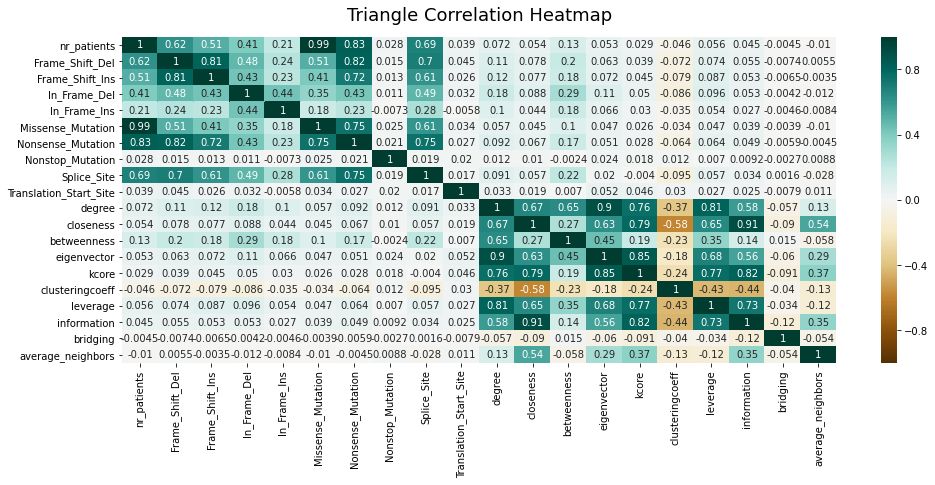

In [5]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
#heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [6]:
# removing correlation bigger than 0.9
df = df.drop(columns=['nr_patients', 'information'])

In [7]:
df.to_csv("./data/MutationCell2018_eReactome_eHPRD_v18feat.tsv", sep='\t')